
<h1 align="center"><font size="10">PRML PROJECT PRESENTATION</font></h1>
<h1 align="center"><font size="5">RESTRICTED BOLTZMANN MACHINES</font></h1>


### Annu, EE21RESCH01010
### Shantanu Yadav, EE20MTECH12001

<h3>Introduction</h3>
<b>Restricted Boltzmann Machine (RBM):</b>  RBMs are shallow neural nets that learn to reconstruct data by themselves in an unsupervised fashion.  

<h4>Why are RBMs important?</h4>
An RBM are a basic form of autoencoder.  It can automatically extract <b>meaningful</b> features from a given input.

<h4>How does it work?</h4>
RBM is a 2 layer neural network. Simply, RBM takes the inputs and translates those into a set of binary values that represents them in the hidden layer. Then, these numbers can be translated back to reconstruct the inputs. Through several forward and backward passes, the RBM will be trained, and a trained RBM can reveal which features are the most important ones when detecting patterns.   

<h4>What are the applications of an RBM?</h4>
RBM is useful for collaborative filtering, dimensionality reduction, classification, regression, feature learning, topic modeling and even <b>Deep Belief Networks</b>.

<h4>Is RBM a generative or Discriminative model?</h4>
RBM is a generative model. 

<b>Generative:</b> Looking at cars, we can build a model of what Sedan cars look like. Then, looking at SUVs, we can build a separate model of what SUV cars look like. Finally, to classify a new car, we can match the new car against the Sedan model, and match it against the SUV model, to see whether the new car looks more like the SUV or Sedan. 

Generative Models specify a probability distribution over a dataset of input vectors. In the supervised task, we first form a model for $P(x|y)$, where $P$ is the probability of $x$ given $y$(the label for $x$). For example, if $y = 0$ indicates that a car is an SUV, and $y = 1$ indicates that a car is a sedan, then $p(x|y = 0)$ models the distribution of SUV features, and $p(x|y = 1)$ models the distribution of sedan features. If we manage to find $P(x|y)$ and $P(y)$, then we can use <b>Bayes rule</b> to estimate $P(y|x)$, because:   
        $$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$</li>
</ul>


<a id="ref1"></a>

<h3>Initialization</h3>

First, we have to load the utility file which contains different utility functions that are not connected
in any way to the networks presented in the tutorials, but rather help in
processing the outputs into a more understandable way.


In [ ]:
'''
import urllib.request
with urllib.request.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week4/data/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close()
'''

'\nimport urllib.request\nwith urllib.request.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week4/data/utils.py") as url:\n    response = url.read()\ntarget = open(\'utils.py\', \'w\')\ntarget.write(response.decode(\'utf-8\'))\ntarget.close()\n'

<h2>Installing TensorFlow </h2>

We will installing TensorFlow version 2.2.0 and its required prerequistes.  Also installing pillow...


In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0
!pip install pillow

     |████████████████████████████████| 2.2MB 6.5MB/s 
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.24.3 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 460kB 50.7MB/s 
     |████████████████████████████████| 3.0MB 45.5MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


<b>Notice:</b> This notebook has been created with TensorFlow version 2.2, and might not work with other versions. Therefore we check:


In [ ]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.2.0':
    printmd('<<<<<!!!!! ERROR !!!! please upgrade to TensorFlow 2.2.0, or restart your Kernel (Kernel->Restart & Clear Output)>>>>>')

Now, we load in all the packages that we use to create the net including the TensorFlow package:


In [ ]:
import tensorflow as tf
import numpy as np

from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline

<hr>


# <a id="ref2"></a>

#**RBM layers**

An RBM has two layers. The first layer of the RBM is called the <b>visible</b> (or input layer). Imagine the input with 7 nodes. The second layer is the <b>hidden</b> layer, which has $H$ neurons in our case. Each hidden node takes on values of either 0 or 1 (i.e., $h_i = 1$ or $h_i$ = 0), with a probability that is a logistic function of the inputs it receives from the other $V$ visible units, called for example, $p(h_i = 1)$. 

<center><img src="https://ibm.box.com/shared/static/eu26opvcefgls6vnwuo29uwp0nudmokh.png" alt="RBM Model" style="width: 400px;"></center>


We have to define weights among the input layer and hidden layer nodes. In the weight matrix, the number of rows are equal to the input nodes, and the number of columns are equal to the output nodes. We define a tensor $\mathbf{W}$ of shape = (7,2), where the number of visible neurons = 7, and the number of hidden neurons = 2. 


<hr>


<a id="ref3"></a>

#**What RBM can do after training?**
Think of RBM as a model that has been trained based on images of a dataset of many SUV and sedan cars. Also, imagine that the RBM network has only two hidden nodes, where one node encodes the weight and, and the other encodes the size.  
In a sense, the different configurations represent different cars, where one is an SUV and the other is Sedan.  In a training process, through many forward and backward passes, the RBM adjust its weights to send a stronger signal to either the SUV node (0, 1) or the sedan node (1, 0) in the hidden layer, given the pixels of images. Now, given an SUV in hidden layer, which distribution of pixels should we expect? RBM can give you 2 things. First, it encodes your images in hidden layer. Second, it gives you the probability of observing a case, given some hidden values.

<h3>The Inference Process</h3>

RBM has two phases:

<ul>
    <li>Forward Pass</li>  
    <li>Backward Pass or Reconstruction</li>
</ul>

<b>Phase 1) Forward pass:</b>  

First, the probability vector is computed using the input feature vector $\mathbf{x}$, the weight matrix $\mathbf{W}$, and the bias term $h_{bias}$, as 

$p({h_j}|\mathbf x)= \sigma(\sum_{i=1}^V W_{ij} x_i + h_{bias} )$, 

where $\sigma(z) = (1+e^{-z})^{-1}$ is the logistic function.

$p({h_j})$ is the <b>probability distribution</b> of the hidden units. That is, RBM uses inputs $x_i$ to make predictions about hidden node activations. For example, imagine that the hidden node activation values are [0.51 0.84] for the first training item. It tells you that the conditional probability for each hidden neuron for Phase 1 is: 

$$p(h_{1} = 1|\mathbf{v}) = 0.51$$
$$p(h_{2} = 1|\mathbf{v}) = 0.84$$

As a result, for each row in the training set, vector of probabilities is generated.

We then turn unit $j$ with probability $p(h_{j}|\mathbf{v})$, and turn it off with probability $1 - p(h_{j}|\mathbf{v})$ by generating a uniform random number vector $\mathbf{\xi}$, and comparing it to the activation probability as 

<center>If $\xi_j<p(h_{j}|\mathbf{v})$, then $h_j=1$, else $h_j=0$.</center>

Therefore, the conditional probability of a configuration of $\mathbf{h}$ given $\mathbf{v}$ (for a training sample) is:

$$p(\mathbf{h} \mid \mathbf{v}) = \prod_{j=1}^H p(h_j \mid \mathbf{v})$$

where $H$ is the number of hidden units.


Consider an example, assume that we have a trained RBM, and a very simple input vector, such as [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0].  
Let's see what the output of forward pass would look like:


In [ ]:
v_bias = tf.Variable(tf.zeros([7]), tf.float32)
h_bias = tf.Variable(tf.zeros([2]), tf.float32)

In [ ]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7, 2)).astype(np.float32))

In [ ]:
#Forward Pass
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], tf.float32)
v_state = X
h_bias = tf.constant([0.1,0.1])

W = tf.constant(np.random.normal(0.0,1.0,size =(7,2)).astype(np.float32))
h_prob = tf.nn.sigmoid(tf.matmul(v_state,W)+h_bias)
xi = tf.random.uniform(tf.shape(h_prob))
h_state = tf.nn.relu(tf.sign(h_prob - xi))

print('Input : ',v_state.numpy()[0])
print('p(h|v) : ',h_prob.numpy()[0])
print('xi : ',xi.numpy()[0])
print('is xi < p(h|v) :',(xi<h_prob).numpy()[0])
print('h states : ',h_state.numpy()[0])

Input :  [1. 0. 0. 1. 0. 0. 0.]
p(h|v) :  [0.03479123 0.16215788]
xi :  [0.65449166 0.2103939 ]
is xi < p(h|v) : [False False]
h states :  [0. 0.]


<b>Phase 2) Backward Pass (Reconstruction):</b>
The RBM reconstructs data by making several forward and backward passes between the visible and hidden layers.

So, in the second phase (i.e. reconstruction phase), the samples from the hidden layer (i.e. $\mathbf h$) becomes the input in the backward pass. The same weight matrix and visible layer biases are used to passed to the sigmoid function. The reproduced output is a reconstruction which is an approximation of the original input.


In [ ]:
#Backward Pass
v_bias = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
v_prob = tf.sigmoid(tf.matmul(h_state,tf.transpose(W))+v_bias)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))

print('p(vi|h) = ',v_prob.numpy()[0])
print('v probability states : ',v_state.numpy()[0])

p(vi|h) =  [0.5249792  0.54983395 0.5249792  0.5249792  0.5249792  0.54983395
 0.5249792 ]
v probability states :  [1. 0. 0. 0. 0. 1. 1.]


RBM learns a probability distribution over the input, and then, after being trained, the RBM can generate new samples from the learned probability distribution. As you know, <b>probability distribution</b>, is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.

The (conditional) probability distribution over the visible units v is given by

$p(\mathbf{v} \mid \mathbf{h}) = \prod_{i=1}^V p(v_i \mid \mathbf{h}),$

where,

$p(v_i \mid \mathbf{h}) = \sigma\left(\sum_{j=1}^H W_{ji} h_j + v_{bias} \right)$

so, given current state of hidden units and weights, what is the probability of generating [1. 0. 0. 1. 0. 0. 0.] in reconstruction phase, based on the above <b>probability distribution</b> function?


In [ ]:
#probability of generating input is the prob that all the elements of input are equal to 1 (NOTE: INPUT AND HIDDEN STATES ARE BINARY)

inp = X
print("input X:" , inp.numpy())

print("p(vi|h) = " , v_prob[0].numpy())
v_probability = 1

for elm, p in zip(inp[0],v_prob[0]) :
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)

print("p(v) =  " , v_probability.numpy())

input X: [[1. 0. 0. 1. 0. 0. 0.]]
p(vi|h) =  [0.5249792  0.54983395 0.5249792  0.5249792  0.5249792  0.54983395
 0.5249792 ]
p(v) =   0.0059864256


<hr>


#**RBM IMPLEMENTATION ON MNIST DATA**


We will be using the MNIST dataset to practice the usage of RBMs. The following cell loads the MNIST dataset.


In [ ]:
#loading training and test data
mnist = tf.keras.datasets.mnist
(trX, trY), (teX, teY) = mnist.load_data()

# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')
trX = flatten(trX/255.0)
trY = flatten(trY/255.0)

Lets look at the dimension of the images.


MNIST images have 784 pixels, so the visible layer must have 784 input nodes.  For our case, we'll use 50 nodes in the hidden layer, so i = 50.


In [ ]:
vb = tf.Variable(tf.zeros([784]), tf.float32)
hb = tf.Variable(tf.zeros([50]), tf.float32)

Let $\mathbf W$ be the Tensor of 784x50 (784 - number of visible neurons, 50 - number of hidden neurons) that represents weights between the neurons. 


In [ ]:
W = tf.Variable(tf.zeros([784,50]), tf.float32)

Lets define the visible layer:


In [ ]:
v0_state = tf.Variable(tf.zeros([784]), tf.float32)

#testing to see if the matrix product works
tf.matmul( [v0_state], W)

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)>

Now, we can define hidden layer:


In [ ]:
#computing the hidden nodes probability vector and checking shape
h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
print("h0_state shape: " , tf.shape(h0_prob))

#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state


h0_state = hidden_layer(v0_state, W, hb)
print("first 15 hidden states: ", h0_state[0][0:15])

h0_state shape:  tf.Tensor([ 1 50], shape=(2,), dtype=int32)
first 15 hidden states:  tf.Tensor([0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.], shape=(15,), dtype=float32)


Now, we define reconstruction part:


In [ ]:
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]

v1_state = reconstructed_output(h0_state, W, vb)
print("hidden state shape: ", h0_state.shape)
print("v0 state shape:  ", v0_state.shape)
print("v1 state shape:  ", v1_state.shape)

hidden state shape:  (1, 50)
v0 state shape:   (784,)
v1 state shape:   (784,)


#**Objective function**

<b>Goal</b>: Maximize the likelihood of our data being drawn from that distribution

<b>Calculate error:</b>  
In each epoch, we compute the "error" as a sum of the squared difference between step 1 and step n,
e.g the error shows the difference between the data and its reconstruction.



In [ ]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))
'''
err = tf.reduce_mean(tf.square(v0_state - v1_state))
print("error" , err.numpy())
'''

'\nerr = tf.reduce_mean(tf.square(v0_state - v1_state))\nprint("error" , err.numpy())\n'


#**Gibbs Sampling**

<h4>Gibbs Sampling Step 1</h4> 
Given an input vector $\mathbf{v}$, we are using $p(\mathbf{h}|\mathbf{v})$ to predict the hidden values $\mathbf{h}$. 
  $$p({h_j}|\mathbf v)= \sigma\left(\sum_{i=1}^V W_{ij} v_i + h_{bias} \right)$$
The samples are generated from this distribution by generating the uniform random variate vector $\mathbf{\xi} \sim U[0,1]$ of length $H$ and comparing to the computed probabilities as

<center>If $\xi_j<p(h_{j}|\mathbf{v})$, then $h_j=1$, else $h_j=0$.</center>

<h4>Gibbs Sampling Step 2</h4> 
Then, knowing the hidden values, we use $p(\mathbf v| \mathbf h)$ for reconstructing of new input values v. 

   $$p({v_i}|\mathbf h)= \sigma\left(\sum_{j=1}^H W^{T}_{ij} h_j + v_{bias} \right)$$

The samples are generated from this distribution by generating a uniform random variate vector $\mathbf{\xi} \sim U[0,1]$ of length $V$ and comparing to the computed probabilities as

<center>If $\xi_i<p(v_{i}|\mathbf{h})$, then $v_i=1$, else $v_i=0$.</center>

Let vectors $\mathbf v_k$ and $\mathbf h_k$ be for the $k$th iteration.  In general, the $kth$ state is generrated as: 

<b>Iteration</b> $k$: 

$$\mathbf v_{k-1} \Rightarrow p(\mathbf h_{k-1}|\mathbf v_{k-1})\Rightarrow \mathbf h_{k-1}\Rightarrow p(\mathbf v_{k}|\mathbf h_{k-1})\Rightarrow \mathbf v_k$$       

<h3>Contrastive Divergence (CD-k)</h3>
The update of the weight matrix is done during the Contrastive Divergence step. 

Vectors v0 and vk are used to calculate the activation probabilities for hidden values h0 and hk. The difference between the outer products of those probabilities with input vectors v0 and vk results in the update matrix:

$\Delta \mathbf W_k =\mathbf v_k \otimes \mathbf h_k - \mathbf v_{k-1} \otimes \mathbf h_{k-1}$ 

Contrastive Divergence is actually matrix of values that is computed and used to adjust values of the $\mathbf W$ matrix. Changing $\mathbf W$ incrementally leads to training of the  $\mathbf W$ values. Then, on each step (epoch), $\mathbf W$ is updated using the following:

$\mathbf W_k = \mathbf W_{k-1} + \alpha * \Delta \mathbf W_k$ 



In [ ]:
h1_prob = tf.nn.sigmoid(tf.matmul([v1_state], W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random.uniform(tf.shape(h1_prob)))) #sample_h_given_X

Lets look at the error of the first run:


In [ ]:
print("error: ", error(v0_state, v1_state))

error:  tf.Tensor(0.52933675, shape=(), dtype=float32)


In [ ]:
#Parameters
alpha = 0.01
epochs = 1
batchsize = 200
weights = []
errors = []
batch_number = 0
K = 1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((trX, trY)).batch(batchsize)

for epoch in range(epochs):
    for batch_x, batch_y in train_ds:
        batch_number += 1
        for i_sample in range(batchsize):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == batchsize-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % epoch, 
                       "batch #: %i " % batch_number, "of %i" % int(60e3/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)



Epoch: 0 batch #: 1  of 300 sample #: 199 reconstruction error: 0.153629
Epoch: 0 batch #: 2  of 300 sample #: 199 reconstruction error: 0.214964
Epoch: 0 batch #: 3  of 300 sample #: 199 reconstruction error: 0.117193
Epoch: 0 batch #: 4  of 300 sample #: 199 reconstruction error: 0.121685
Epoch: 0 batch #: 5  of 300 sample #: 199 reconstruction error: 0.119511
Epoch: 0 batch #: 6  of 300 sample #: 199 reconstruction error: 0.205661
Epoch: 0 batch #: 7  of 300 sample #: 199 reconstruction error: 0.087013
Epoch: 0 batch #: 8  of 300 sample #: 199 reconstruction error: 0.125276
Epoch: 0 batch #: 9  of 300 sample #: 199 reconstruction error: 0.092099
Epoch: 0 batch #: 10  of 300 sample #: 199 reconstruction error: 0.177222
Epoch: 0 batch #: 11  of 300 sample #: 199 reconstruction error: 0.088540
Epoch: 0 batch #: 12  of 300 sample #: 199 reconstruction error: 0.136295
Epoch: 0 batch #: 13  of 300 sample #: 199 reconstruction error: 0.072687
Epoch: 0 batch #: 14  of 300 sample #: 199 reco

Let's take a look at the errors at the end of each batch:


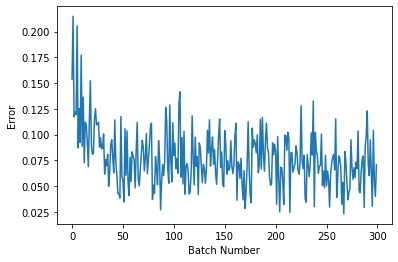

In [ ]:
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

What is the final weight matrix $W$ after training?


<a id="ref5"></a>
#**Learned features**


We can take each hidden unit and visualize the connections between that hidden unit and each element in the input vector. In our case, we have 50 hidden units. Lets visualize those.


Let's plot the current weights:
<b>tile_raster_images</b> helps in generating an easy to grasp image from a set of samples or weights. It transforms the <b>uw</b> (with one flattened image per row of size 784), into an array (of size $28\times28$) in which images are reshaped and laid out like tiles on a floor.


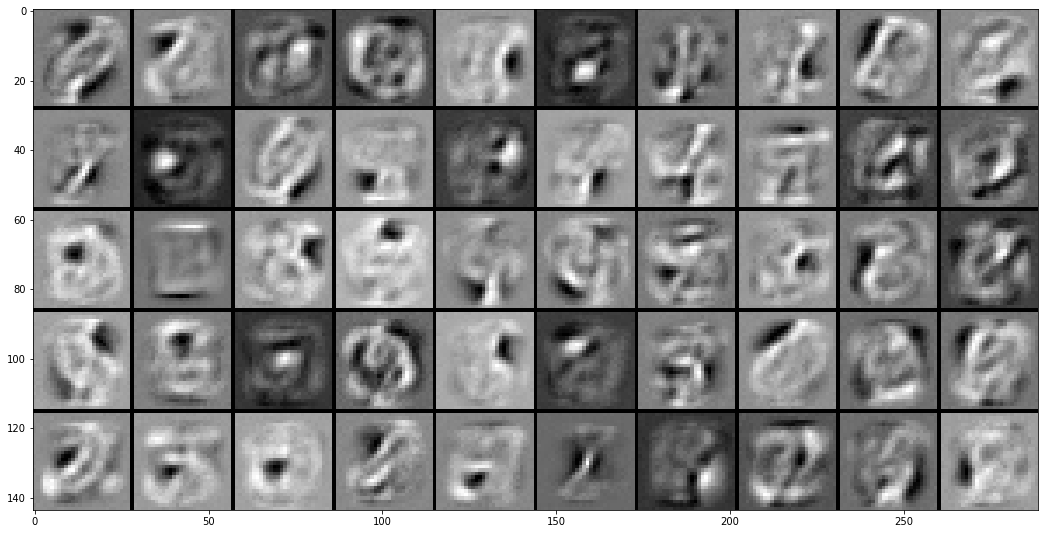

In [ ]:
tile_raster_images(X=W.numpy().T, img_shape=(28, 28), tile_shape=(5, 10), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=W.numpy().T, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

### References:

[https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)  
[http://deeplearning.net/tutorial/rbm.html](http://deeplearning.net/tutorial/rbm.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)  
[http://www.cs.utoronto.ca/~hinton/absps/netflixICML.pdf](http://www.cs.utoronto.ca/~hinton/absps/netflixICML.pdf?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
<http://imonad.com/rbm/restricted-boltzmann-machine/>  
